In [1]:
import Pkg; Pkg.add("Plots")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [

    Fetching: [======================>                  ]  

    Fetching: [================================

Fetching: [========================================>]  100.0 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [1]:
using Coleman, Plots


Welcome to Nemo version 0.17.1-dev

Nemo comes with absolutely no warranty whatsoever


Welcome to 


$\require{action}$


    _    _           _
   | |  | |         | |
   | |__| | ___  ___| | _____
   |  __  |/ _ \/ __| |/ / _ \
   | |  | |  __/ (__|   <  __/
   |_|  |_|\___|\___|_|\_\___|
    
Version 0.8.0 ... 
 ... which comes with absolutely no warranty whatsoever
(c) 2015-2019 by Claus Fieker, Tommy Hofmann and Carlo Sircana



In [2]:
using Nemo, Hecke

In [3]:
set_printing_mode(FlintPadicField, :val_unit)
N = 2

2

In [79]:
data = []
for p in PrimesSet((2*N-1)*(5),10000)
    if p == 997
        continue
    end
    K = PadicField(p,N)
    R,x = PolynomialRing(K,"x")
    # want a curve with a rational weierstrass point and rank >= 1 https://www.lmfdb.org/Genus2Curve/Q/?hst=List&num_rat_wpts=1-&analytic_rank=1-&search_type=List
    h =  4x^5 - 8x^4 + 8x^3 - 4x^2 + 1 # 997.b.997.1
    P = (K(0), K(-1))
    #println(p)
    try
        #println(map(t -> t, ColemanIntegrals(2, h, N, p, 1, P, :inf)[1:2,:])[1,1])
        #println(map(t -> Float64(lift(t//K(p)))/p, ColemanIntegrals(2, h, N, p, 1, P, :inf)[1:2,:])[1,1])
        append!(data, (map(t -> Float64(lift(t//K(p)))/p, ColemanIntegrals(2, h, N, p, 1, P, :inf)[1:2,:]))[1,1])
    catch e
    end
end

Exception (padic_get_fmpz).  Negative valuation.
Exception (padic_get_fmpz).  Negative valuation.


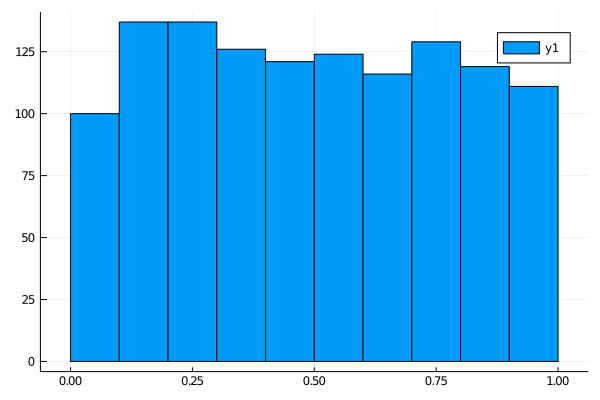

In [80]:
histogram(data)

In [4]:
function equidistdata(f, P; badp = [], pbound = 1000, a = 2)
    data = []
    data2 = []
    RI = RegularIndices(a, f)
    for p in PrimesSet((2*N-1)*degree(f), pbound)
        if p in badp
            continue
        end
        K = PadicField(p,N)
        #R,x = PolynomialRing(K,"x")
        h = change_base_ring(K, f)
        PK = map(x->K(x),P)
        #println(p)
        try
            ints = ColemanIntegrals(a, h, N, p, 1, PK, :inf)
            C = map(t -> Float64(lift(t//K(p)))/p, [ints[i,1] for i in RI])
            push!(data, C[1]) 
            push!(data2, C[2]) 
        catch e
        end
    end
    return data,data2
end

equidistdata (generic function with 1 method)

In [5]:
R,x = PolynomialRing(QQ,"x")

(Univariate Polynomial Ring in x over Rational Field, x)

In [156]:
edata2080 =  equidistdata(4*x^5 + x^4 + 256*x^3 + 192*x^2 + 48*x + 4, (0, 2), pbound=10000) # 2080.a.4160.2 2, 5, 13

(Any[0.9411764705882353, 0.8947368421052632, 0.13043478260869565, 0.1724137931034483, 0.8709677419354839, 0.5135135135135135, 0.0975609756097561, 0.20930232558139536, 0.0851063829787234, 0.6037735849056604  …  0.20481440275108728, 0.5244924755075245, 0.23993136166347026, 0.8612314824145924, 0.6680431060529761, 0.9663679387775652, 0.32139623780303794, 0.18253090762890742, 0.3047055282432026, 0.08061766770279756], Any[0.5294117647058824, 0.05263157894736842, 0.43478260869565216, 0.41379310344827586, 0.06451612903225806, 0.24324324324324326, 0.9512195121951219, 0.3953488372093023, 0.9574468085106383, 0.6981132075471698  …  0.39759279862445635, 0.23775376224623776, 0.38003431916826486, 0.5693842587927038, 0.16597844697351194, 0.0168160306112174, 0.33930188109848103, 0.9087345461855463, 0.34764723587839874, 0.9596911661486012])

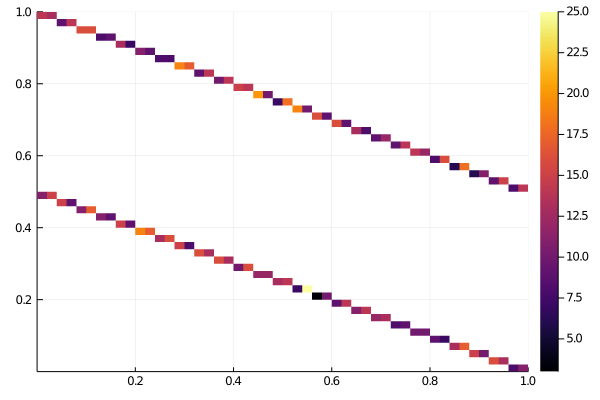

In [207]:
histogram2d(edata2080,bins=73) # 2156.b.34496.1, 2, 7, 11

In [165]:
[a+2*b for (a,b) in zip(edata2080[1], edata2080[2])]

1222-element Array{Float64,1}:
 2.0
 1.0
 1.0
 1.0
 1.0
 1.0
 2.0
 1.0
 2.0
 2.0
 2.0
 2.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 2.0
 1.0
 1.0
 1.0
 2.0
 1.0
 2.0

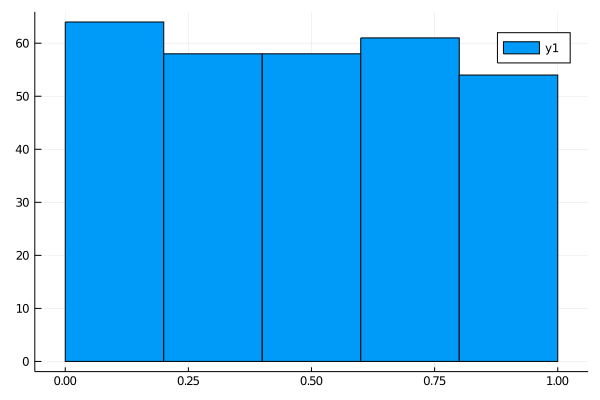

In [96]:
histogram(equidistdata(8x^5 - 3x^4 - 18x^3 + x^2 + 12x + 4, (0, 2), pbound=2000)) # 2156.b.34496.1, 2, 7, 11

In [138]:
edata = equidistdata(8x^5 - 3x^4 - 18x^3 + x^2 + 12x + 4, (0, 2), pbound=10000) # 2156.b.34496.1, 2, 7, 11

(Any[0.7647058823529411, 0.2631578947368421, 0.43478260869565216, 0.034482758620689655, 0.9032258064516129, 0.05405405405405406, 0.7209302325581395, 0.02127659574468085, 0.5660377358490566, 0.3728813559322034  …  0.7295438454536259, 0.45116654883345114, 0.2492177248410215, 0.2143504988410763, 0.8713868466109377, 0.6763669318296244, 0.06890654863695805, 0.4636646899185848, 0.1432728002407946, 0.6269928807781009], Any[0.47058823529411764, 0.47368421052631576, 0.13043478260869565, 0.9310344827586207, 0.1935483870967742, 0.8918918918918919, 0.5581395348837209, 0.9574468085106383, 0.8679245283018868, 0.2542372881355932  …  0.540912309092748, 0.09766690233309766, 0.501564550317957, 0.5712990023178475, 0.2572263067781247, 0.6472661363407511, 0.8621869027260839, 0.07267062016283043, 0.7134543995184107, 0.7460142384437982])

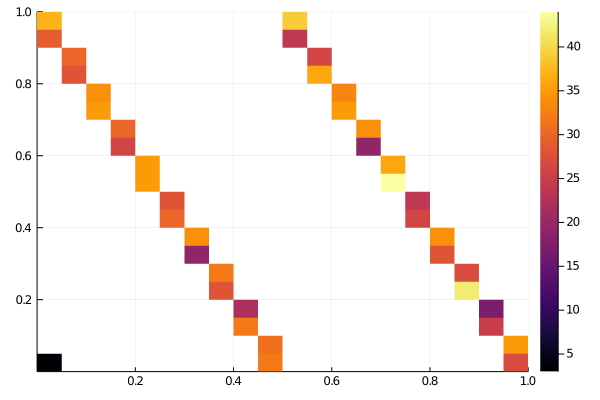

In [167]:
histogram2d(edata,bins=23) # 2156.b.34496.1, 2, 7, 11

In [166]:
[2*a+b for (a,b) in zip(edata[1], edata[2])]

1221-element Array{Float64,1}:
 2.0
 1.0
 1.0
 1.0
 2.0
 1.0
 2.0
 1.0
 2.0
 1.0
 1.0
 2.0
 1.0
 ⋮
 2.0
 2.0
 2.0
 1.0
 1.0
 1.0
 2.0
 2.0
 1.0
 1.0
 1.0
 2.0

In [177]:
edata997 = equidistdata(4x^5 - 8x^4 + 8x^3 - 4x^2 + 1, (0, -1), pbound=10000, badp=[ZZ(997)]) # 997.b.997.1

Exception (padic_get_fmpz).  Negative valuation.
Exception (padic_get_fmpz).  Negative valuation.


(Any[0.8823529411764706, 0.0, 0.30434782608695654, 0.0, 0.3870967741935484, 0.0, 0.5853658536585366, 0.627906976744186, 0.7872340425531915, 0.18867924528301888  …  0.5343380196217254, 0.4332895667104333, 0.9870798425355809, 0.38808827975410665, 0.7932319468224394, 0.9809686839190414, 0.897092847802032, 0.9799979897477133, 0.5888431825022574, 0.17527323774190315], Any[0.0, 0.8421052631578947, 0.34782608695652173, 0.20689655172413793, 0.5483870967741935, 0.0, 0.17073170731707318, 0.06976744186046512, 0.7021276595744681, 0.7169811320754716  …  0.9765348437341964, 0.21512978487021514, 0.2505299283335016, 0.8575027713393127, 0.4847416658273744, 0.7652804350015104, 0.8725480333970426, 0.8960699567795758, 0.6242600581920337, 0.8962197934422942])

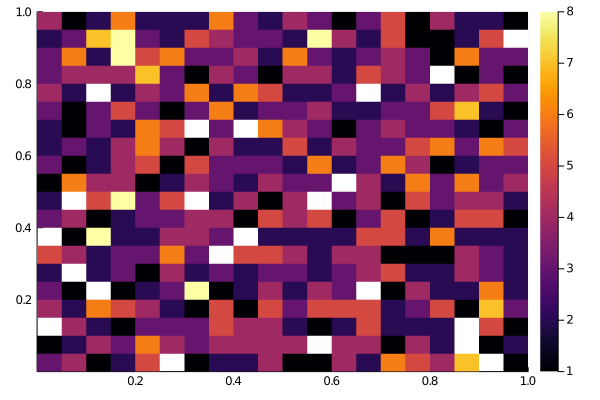

In [187]:
histogram2d(edata997,bins=38) # 997

In [172]:
edata2624 = equidistdata(4*x^5 - 95*x^4 + 16*x^3 + 42*x^2 + 12*x + 1, (0, -1), pbound=10000, badp=[ZZ(2), ZZ(41)]) #  2624.a.2624.2

(Any[0.7647058823529411, 0.10526315789473684, 0.7391304347826086, 0.6206896551724138, 0.5806451612903226, 0.9459459459459459, 0.9534883720930233, 0.723404255319149, 0.9433962264150944, 0.0  …  0.9278851016486295, 0.020805979194020805, 0.6130009084485717, 0.6263226846719742, 0.8616174841373754, 0.6317591380525627, 0.4594105220802736, 0.6208664187355513, 0.5957660278920437, 0.6067381931214278], Any[0.11764705882352941, 0.9473684210526315, 0.13043478260869565, 0.6896551724137931, 0.7096774193548387, 0.02702702702702703, 0.023255813953488372, 0.6382978723404256, 0.5283018867924528, 0.0  …  0.5360574491756852, 0.9895970104029896, 0.19349954577571415, 0.1868386576640129, 0.06919125793131231, 0.6841204309737187, 0.27029473895986317, 0.18956679063222434, 0.7021169860539781, 0.19663090343928608])

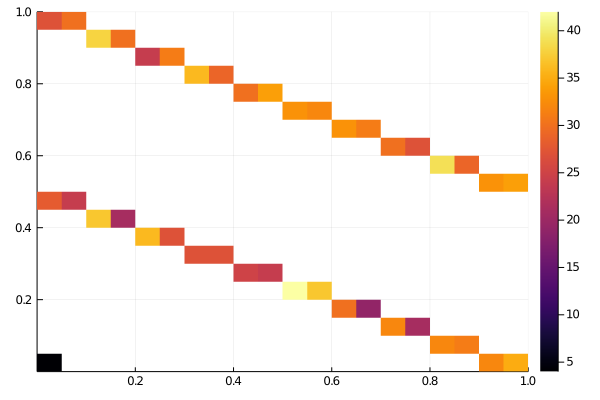

In [175]:
histogram2d(edata2624,bins=23) # 2624

In [174]:
[a+2*b for (a,b) in zip(edata2624[1], edata2624[2])]

1221-element Array{Float64,1}:
 1.0
 2.0
 1.0
 2.0
 2.0
 1.0
 1.0
 2.0
 2.0
 0.0
 2.0
 2.0
 2.0
 ⋮
 1.0
 2.0
 2.0
 2.0
 1.0
 1.0
 1.0
 2.0
 1.0
 1.0
 2.0
 1.0

In [ ]:
edata32624 = equidistdata(4*x^5 - 95*x^4 + 16*x^3 + 42*x^2 + 12*x + 1, (0, 1), pbound=3000, a=3, badp=[ZZ(2), ZZ(41)]) #  2624.a.2624.2

In [ ]:
histogram2d(edata32624,bins=23) # 2624

In [210]:
[a for (a,b) in zip(edata32624[1], edata32624[2])]

51-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [16]:
edata102400 = equidistdata(x^5 - x^3 - x, (-1, -1), pbound=30000, a=2, badp=[ZZ(2), ZZ(5)]) # 102400.b.102400.1

(Any[0.4117647058823529, 0.7894736842105263, 0.08695652173913043, 0.13793103448275862, 0.7096774193548387, 0.13513513513513514, 0.2682926829268293, 0.627906976744186, 0.851063829787234, 0.49056603773584906  …  0.29662236802463765, 0.5980789183038254, 0.8196847495063753, 0.34565631580706624, 0.1242271314461415, 0.1124068566845992, 0.43867499248672653, 0.6050602490069762, 0.7893806490344528, 0.4511654273233519], Any[0.7647058823529411, 0.6842105263157895, 0.6956521739130435, 0.5862068965517241, 0.967741935483871, 0.3783783783783784, 0.5365853658536586, 0.09302325581395349, 0.5957446808510638, 0.18867924528301888  …  0.6664211830080675, 0.7631112152347803, 0.7161741574913825, 0.19594210649463517, 0.09779084923632232, 0.4296120560029405, 0.035162119744882626, 0.3220401214993825, 0.5456758830003668, 0.8557471072726667])

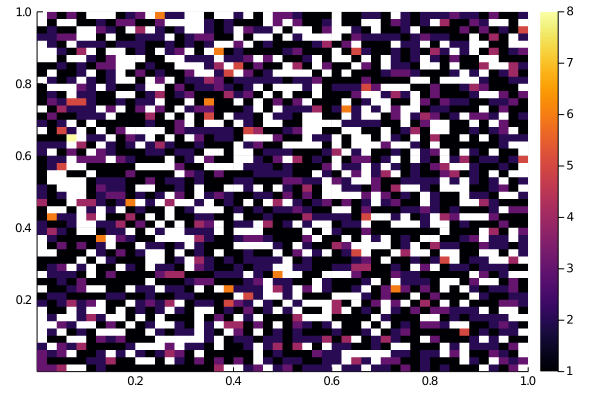

In [36]:
histogram2d(edata102400,bins=49) # 2624

In [17]:
length(edata102400[1])

3239

In [27]:
collect(zip(edata102400[1],edata102400[2]))[1:10]

10-element Array{Tuple{Any,Any},1}:
 (0.4117647058823529, 0.7647058823529411)
 (0.7894736842105263, 0.6842105263157895)
 (0.08695652173913043, 0.6956521739130435)
 (0.13793103448275862, 0.5862068965517241)
 (0.7096774193548387, 0.967741935483871)
 (0.13513513513513514, 0.3783783783783784)
 (0.2682926829268293, 0.5365853658536586)
 (0.627906976744186, 0.09302325581395349)
 (0.851063829787234, 0.5957446808510638)
 (0.49056603773584906, 0.18867924528301888)

In [32]:
collect(zip((Float64(1),Float64(2),Float64(3)),(1,2,3)))

3-element Array{Tuple{Float64,Int64},1}:
 (1.0, 1)
 (2.0, 2)
 (3.0, 3)